# Machine Learning - Spam ou Ham

Base de Dados Utilizada: http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/index.html  
(obtido da página 105 do livro "Doing Data Science")

In [1]:
# Carregamento dos dados
import numpy as np
import pandas as pd
from sklearn.datasets import load_files

X, y = [], []
for i in range(1,7):
    emails = load_files(f"enron{i}")
    X = np.append(X, emails.data)
    y = np.append(y, emails.target)

classes = emails.target_names

In [2]:
# Verificação dos dados - tamanho e imprimir exemplo
print(f"X.shape: {X.shape:}")
print(f"y.shape: {y.shape}")
print("\n")
print(f"Exemplo X[0]: {X[0]}")
print("\n")
print(f"Classe X[0]: {y[0]} ({classes[int(y[0])]})")

X.shape: (33715,)
y.shape: (33715,)


Exemplo X[0]: b'Subject: nesa / hea \' s 24 th annual meeting\r\nsaddle up for nesa / hea \' s 24 th annual meeting\r\n" deep in the heart of texas "\r\nseptember 9 - 11 , 2001\r\nhyatt regency hill country resort\r\nsan antonio , texas\r\nthe annual meeting planning committee has put together an outstanding\r\nprogram for your review . it is attached below in an adobe acrobat pdf file\r\n- if you have problems with the attachment please call nesa / hea\r\nheadquarters at ( 713 ) 856 - 6525 and we \' ll mail or fax a copy out immediately .\r\ngeneral session topics include :\r\n* will tomorrow \' s restructured electric infrastructure support\r\ntomorrow \' s economy ?\r\n* power deregulation panel : developer / ipp , utility / transmission , power\r\nmarketer , government , retail\r\n* power demand\r\n* the state of the energy industry\r\n* new political administration - impact on energy policy and\r\nenvironment\r\nnetworking opportunities :\r\n*

<function matplotlib.pyplot.show(*args, **kw)>

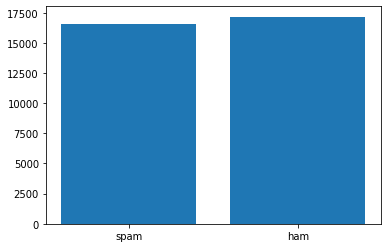

In [3]:
# Verificação dos dados - distribuição do target (classes balanceadas)

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(Counter(y).keys(), Counter(y).values(),tick_label =('spam', 'ham'))
plt.show

In [4]:
# Limpeza dos dados
import re

X_tratado = []

for email in range(0, len(X)): 
    
    # Remover caracteres especiais
    texto = re.sub(r'\\r\\n', ' ', str(X[email]))
    texto = re.sub(r'\W', ' ', texto)
    
    # Remove caracteres simples de uma letra
    texto = re.sub(r'\s+[a-zA-Z]\s+', ' ', texto)
    texto = re.sub(r'\^[a-zA-Z]\s+', ' ', texto) 

    # Substitui multiplos espaços por um unico espaço
    texto = re.sub(r'\s+', ' ', texto, flags=re.I)

    # Remove o 'b' que aparece no começo
    texto = re.sub(r'^b\s+', '', texto)

    # Converte para minúsculo
    texto = texto.lower()

    X_tratado.append(texto)

In [5]:
print(f"Exemplo X[0]: {X_tratado[0]}")
print("\n")
print(f"Classe X[0]: {y[0]} ({classes[int(y[0])]})")

Exemplo X[0]: subject nesa hea 24 th annual meeting saddle up for nesa hea 24 th annual meeting deep in the heart of texas september 9 11 2001 hyatt regency hill country resort san antonio texas the annual meeting planning committee has put together an outstanding program for your review it is attached below in an adobe acrobat pdf file if you have problems with the attachment please call nesa hea headquarters at 713 856 6525 and we ll mail or fax copy out immediately general session topics include will tomorrow restructured electric infrastructure support tomorrow economy power deregulation panel developer ipp utility transmission power marketer government retail power demand the state of the energy industry new political administration impact on energy policy and environment networking opportunities opening reception sunday september 9 golf tournament tours of area attractions monday september 10 the hyatt regency hill country resort has limited block of rooms available for nesa hea 

In [6]:
# Separa os dados em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X_tratado, y, test_size=0.3)

In [7]:
# Aplicação do classificador Naive Bayes
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('classificador', MultinomialNB())])

clf_pipeline.fit(X_train, y_train)
predictions = clf_pipeline.predict(X_train)
score = accuracy_score(y_train,predictions)
print(f"Acurácia de treinamento: {score*100:.2f}%")

predictions_test = clf_pipeline.predict(X_test)
score = accuracy_score(y_test, predictions_test)
print(f"Acurácia de teste: {score*100:.2f}%")
print()

print("Matriz de confusão do set de teste:")
y_true = pd.Series(y_test, name='Real')
y_pred = pd.Series(predictions_test, name='Previsto')
pd.crosstab(y_true, y_pred)

Acurácia de treinamento: 99.14%
Acurácia de teste: 98.71%

Matriz de confusão do set de teste:


Previsto,0.0,1.0
Real,,
0.0,4946,51
1.0,79,5039


In [8]:
# Teste de previsão em um texto novo de e-mail:

texto = """Folks.
I have a meeting today to discuss a research project, and then I was invited to a meeting with the campus 
board about continuing the Data Science specialization course.
This second meeting is expected to start at 5 pm and will likely extend until after our class start time.
That way, I think it's best to release you from today's class.
Today's content is “data wrangling,” which corresponds to chapters 5 through 8 of the book Python for 
Data Analysis, which is part of the file I sent you earlier this semester. Please read these chapters 
(they are short) and do the exercises during this week.
In our next class we will start with a section of questions about these materials and then we will talk 
about feature selection selection.
See you on the 31st, then.
Regards, Jefferson Andrade."""

previsao = clf_pipeline.predict([texto])
probabilidade  = np.max(clf_pipeline.predict_proba([texto]))

print(f"Classe prevista: {previsao} = {classes[int(previsao)]} com probabilidade {probabilidade*100:.2f}%")

Classe prevista: [0.] = ham com probabilidade 98.29%


In [9]:
# Função que receba o nome do arquivo com a mensagem e informe se a mensagem é ou não spam

def prever_spam_ham(caminho):
    arquivo = open(caminho,"r", encoding="utf8") 
    texto = arquivo.read()
    arquivo.close()
    previsao = clf_pipeline.predict([texto])
    probabilidade  = np.max(clf_pipeline.predict_proba([texto]))
    print(f"Texto: {texto}")
    print("\n")
    print(f"Classe prevista: {previsao} = {classes[int(previsao)]} com probabilidade {probabilidade*100:.2f}%")
    
prever_spam_ham("texto.txt")

Texto: Folks.
I have a meeting today to discuss a research project, and then I was invited to a meeting with the campus 
board about continuing the Data Science specialization course.
This second meeting is expected to start at 5 pm and will likely extend until after our class start time.
That way, I think it's best to release you from today's class.
Today's content is “data wrangling,” which corresponds to chapters 5 through 8 of the book Python for 
Data Analysis, which is part of the file I sent you earlier this semester. Please read these chapters 
(they are short) and do the exercises during this week.
In our next class we will start with a section of questions about these materials and then we will talk 
about feature selection selection.
See you on the 31st, then.
Regards, Jefferson Andrade.


Classe prevista: [0.] = ham com probabilidade 98.29%


In [10]:
# Salvar modelo em Joblib
import joblib

joblib.dump(clf_pipeline, 'modelo.pkl')

['modelo.pkl']

In [11]:
# Fim